In [1]:
from mpl_toolkits import mplot3d
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from ipywidgets import interact, fixed
import seaborn as sns; sns.set()

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
   
   # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
   
   # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
   
   # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [3]:
X, y = make_circles(100, factor=.1, noise=.1)
r = np.exp(-(X ** 2).sum(1))
clf = SVC(kernel='linear').fit(X, y)

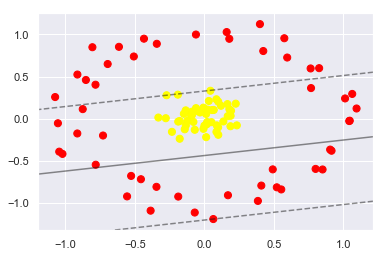

interactive(children=(IntSlider(value=0, description='elev', max=1), IntSlider(value=30, description='azim', m…

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=0, azip=(-180, 180), X=fixed(X), y=fixed(y));